# Testing Using Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
data_train=pd.read_csv('train.csv')

In [75]:
data_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


In [76]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    668 non-null    int64  
 1   Name      668 non-null    object 
 2   Sex       668 non-null    object 
 3   Age       536 non-null    float64
 4   SibSp     668 non-null    int64  
 5   Parch     668 non-null    int64  
 6   Ticket    668 non-null    object 
 7   Fare      668 non-null    float64
 8   Cabin     154 non-null    object 
 9   Embarked  667 non-null    object 
 10  Survived  668 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 57.5+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

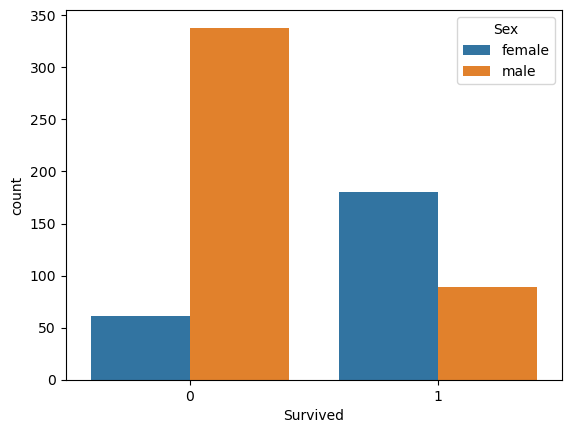

In [77]:
sns.countplot(x='Survived',data=data_train,hue='Sex')

# Data cleaning

In [79]:
data_train.isna().sum()       #no of null values in each column

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
dtype: int64

In [80]:
data_train['Age'].mean()

29.700559701492537

In [81]:
#filling the null values of age column as part of data cleaning.

data_train['Age'].fillna(data_train['Age'].mean(),inplace=True)
data_train['Age'].isna().sum()

0

In [82]:
data_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.00000,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,29.70056,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.00000,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.00000,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.00000,0,0,SOTON/OQ 392076,7.050,NaN,S,0


In [83]:
#deleted the unwanted non-integral columns
data_train.drop(["Name","Ticket","Cabin","Embarked"], axis=1,inplace=True)

In [84]:
#converting sex column to numerical values

gender=pd.get_dummies(data_train['Sex'],drop_first=True)                    #it converts gives 2 diffrent columns so we delete the first one.

In [85]:
data_train['Gender']=gender                  #gender column has 2 values 0 for female and 1 for male

In [86]:
data_train.drop(["Sex"], axis=1,inplace=True)

In [87]:
data_train.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Gender
0,2,29.00000,1,0,26.000,1,0
1,3,29.70056,0,0,8.050,0,1
2,2,39.00000,0,0,26.000,0,1
3,3,29.00000,0,4,21.075,0,0
4,3,25.00000,0,0,7.050,0,1


In [88]:
#seperating Dependent and Independent variables

x=data_train[['Pclass','Age','SibSp','Parch','Fare','Survived','Gender']]
y=data_train['Survived']

# Building model using SKlearn

In [89]:
#train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [90]:
#impoting logistic reg
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [91]:
#fitting the lr

lr.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
#prediction
prd=lr.predict(x_test)

# Testing

In [96]:
from sklearn.metrics import confusion_matrix

In [99]:
pd.DataFrame(confusion_matrix(y_test,prd),columns=['Pred No','Pred Yes'],index=['Actual No','Actual Yes'])

,Pred No,Pred Yes
Actual No,124,0
Actual Yes,0,97


# Predicting for test data

In [100]:
data_test=pd.read_csv('train.csv')

In [102]:
data_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


In [104]:
data_test.isna().sum()  

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
dtype: int64

In [105]:
data_test['Age'].mean()

29.700559701492537

In [107]:
data_test['Age'].fillna(data_train['Age'].mean(),inplace=True)
data_test['Age'].isna().sum()

0

In [109]:
data_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.00000,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,29.70056,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.00000,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.00000,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.00000,0,0,SOTON/OQ 392076,7.050,NaN,S,0


In [110]:
#deleted the unwanted non-integral columns
data_test.drop(["Name","Ticket","Cabin","Embarked"], axis=1,inplace=True)

In [111]:
#converting sex column to numerical values

gender=pd.get_dummies(data_test['Sex'],drop_first=True)                    #it converts gives 2 diffrent columns so we delete the first one.

In [112]:
data_test['Gender']=gender   

In [113]:
data_test.drop(["Sex"], axis=1,inplace=True)

In [114]:
data_test.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Gender
0,2,29.00000,1,0,26.000,1,0
1,3,29.70056,0,0,8.050,0,1
2,2,39.00000,0,0,26.000,0,1
3,3,29.00000,0,4,21.075,0,0
4,3,25.00000,0,0,7.050,0,1


In [115]:
prd=lr.predict(data_test)

In [117]:
np.savetxt(X=prd, delimiter=',', fname='titanic predicted.csv', fmt='%.0f')